# Week 14
1. A classical model in mathematical ecology is the Lotka-Volterra predator-prey model. Consider a simple ecosystem consisting of rabbits that have an infinite supply of food and foxes that prey on the rabbits for their food. This is modeled by a pair of nonlinear, first-order differential equations: 
    $$
    \begin{aligned}
    \frac{dr}{dt}&=2r -\alpha rf, \;r(0) = r_0,\\
    \frac{df}{dt}&=-f + \alpha rf, \;f (0) = f_0\end{aligned} 
    $$
    where $t$ is time, $r(t)$ is the number of rabbits, $f (t)$ is the number of foxes, and $\alpha$ is a positive constant.

    * If $\alpha = 0$, the two populations do not interact, the rabbits do what rabbits do best, and the foxes die off from starvation.

    * If $\alpha > 0$, the foxes encounter the rabbits with a probability that is proportional to the product of their numbers.

    Such an encounter results in a decrease in the number of rabbits and (for less obvious reasons) an increase in the number of foxes. The solutions to this nonlinear system cannot be expressed in terms of other known functions; the equations must be solved numerically. It turns out that the solutions are always periodic, with a period that depends on the initial conditions. In other words, for any $r(0)$ and $f (0)$, there is a value $t = t_p$ when both populations return to their original values. Consequently, for all $t$,

    $$
    \begin{aligned}
    r(t + t_p) = r(t), \;f (t + t_p) = f (t)
    \end{aligned}
    $$

    (1) Compute the solution with $r_0 = 300$, $f_0 = 150$, and $\alpha = 0.01$. You should find that $t_p$ is close to 5. Make two plots, one of $r$ and $f$ as functions of $t$ and one a phase plane plot with $r$ as one axis and $f$ as the other.

    (2) Compute and plot the solution with $r_0 = 15$, $f_0 = 22$, and $\alpha = 0.01$. You should find that $t_p$ is close to 6.62.

    (3) Compute and plot the solution with $r_0 = 102$, $f_0 = 198$, and $\alpha = 0.01$. Determine the period $t_p$ by trial-and-error method.

tf = 4.999947339999998, with r(tf) = -8.533149298273202e-07 and f(tf) = 0.01011972469069633.
    


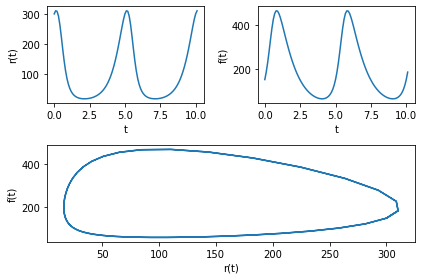

In [1]:
# written by HJH
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def drdfdt(r,f,alpha=0.01):
    # return a list contains [drdt,dfdt]
    return np.array([2*r - alpha*r*f,-f + alpha*r*f])

def rk4(initial,func,tmin=0,tmax=10,delta=0.1):
    # solve the ODE between tmin:delta:tmax with initial condition 
    # initial should contain [r0,f0]
    r0,f0 = initial[0],initial[1]
    r,f,T,t,rf = [r0],[f0],[tmin],tmin,np.array(initial)

    while t < tmax:
        k1 = func(rf[0],rf[1])
        k2 = func(rf[0]+k1[0]*delta/2,rf[1]+k1[1]*delta/2)
        k3 = func(rf[0]+k2[0]*delta/2,rf[1]+k2[1]*delta/2)
        k4 = func(rf[0]+k3[0]*delta,rf[1]+k3[1]*delta)
        t += delta
        rf = rf + (k1+2*k2+2*k3+k4)*delta/6
        r.append(rf[0])
        f.append(rf[1])
        T.append(t)
    
    return r,f,T

def rk4_root(initial,drdfdt,rk4,eps=1e-8):
    # calculate the period of ODE
    R,F,T = rk4(initial,drdfdt)
    R_,F_ = np.array(R)-initial[0], np.array(F)-initial[1]  # alter to function solving problem
    # first find the section contains the solution
    rleft = R_[0]
    idx,rootnum = -1,0
    for r in R_[1:]:
        idx += 1
        if r*rleft < 0:
            # here needs to ignore the first solution
            if rootnum != 1:
                rootnum += 1
            else:
                break
        rleft = r

    rleft,rright = R[idx],R[idx+1]
    fleft,fright = F[idx],F[idx+1]
    tleft,tright = T[idx],T[idx+1]
    its = 0

    while abs(tright-tleft) > eps and its < 1000:
        R,F,T = rk4([rleft,fleft],drdfdt,tmin=tleft,tmax=tright,delta=abs(tright-tleft)/10)
        R_,F_ = np.array(R)-initial[0], np.array(F)-initial[1]
        rleft = R_[0]
        idx = -1
        for r in R_[1:]:
            idx += 1       
            if r*rleft < 0:
                break
            rleft = r 

        rleft,rright = R[idx],R[idx+1]
        fleft,fright = F[idx],F[idx+1]
        tleft,tright = T[idx],T[idx+1]
        its += 1

    print('tf = {}, with r(tf) = {} and f(tf) = {}.\n\
    '.format(tleft,rleft-initial[0],fleft-initial[1]))

R,F,T = rk4([300,150],drdfdt)
rk4_root([300,150],drdfdt,rk4,eps=1e-8)

plt.subplot(2,2,1)
plt.plot(T,R)
plt.xlabel('t')
plt.ylabel('r(t)')

plt.subplot(2,2,2)
plt.plot(T,F)
plt.xlabel('t')
plt.ylabel('f(t)')

plt.subplot(2,1,2)
plt.plot(R,F)
plt.xlabel('r(t)')
plt.ylabel('f(t)')
plt.tight_layout()

tf = 6.622081659999991, with r(tf) = -1.1577424885444998e-07 and f(tf) = 0.04883389425270934.
    


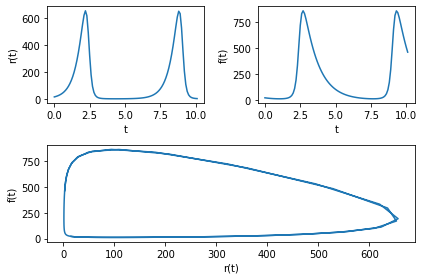

In [2]:
R,F,T = rk4([15,22],drdfdt)
# print(R)
plt.subplot(2,2,1)
plt.plot(T,R)
plt.xlabel('t')
plt.ylabel('r(t)')

plt.subplot(2,2,2)
plt.plot(T,F)
plt.xlabel('t')
plt.ylabel('f(t)')

plt.subplot(2,1,2)
plt.plot(R,F)
plt.xlabel('r(t)')
plt.ylabel('f(t)')
plt.tight_layout()

rk4_root([15,22],drdfdt,rk4,eps=1e-8)

tf = 4.4430654, with r(tf) = -1.580788477895112e-08 and f(tf) = 1.4355108248764736e-05.
    


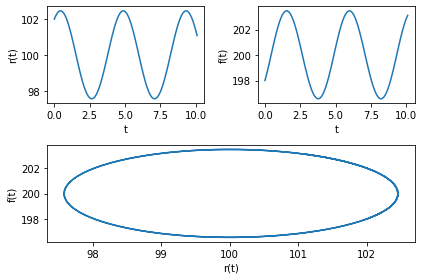

In [3]:
R,F,T = rk4([102,198],drdfdt)
plt.subplot(2,2,1)
plt.plot(T,R)
plt.xlabel('t')
plt.ylabel('r(t)')

plt.subplot(2,2,2)
plt.plot(T,F)
plt.xlabel('t')
plt.ylabel('f(t)')

plt.subplot(2,1,2)
plt.plot(R,F)
plt.xlabel('r(t)')
plt.ylabel('f(t)')
plt.tight_layout()

rk4_root([102,198],drdfdt,rk4,eps=1e-8)

2. The planets in the solar system whose orbits deviate the most from circular are Mercury and Pluto. For Mercury it was known by the early part of the 19th century that the orientation of the axes of the ellipse that describes its orbit rotate with time. This is known as the **precession of the perihelion of Mercury** (the perihelion is the point in an orbit when a planet is nearest the Sun).  The magnitude of this precession is approximately 566 arseconds per century (an arcsecond is 1/3600 of a degree). That is, Mercury's perihelion makes one complete rotation every 230,000 years. While the precision of both the experimental measurement and the theoretical calculation of the precession of Mercury's perihelion are very impressive, the fact remained that they did not agree. It was realized that this disagreement might be evidence for some interesting new physics, and various solutions to this puzzle were proposed. This troubling discrepancy was not explained until 1917 when Einstein developed the theory of general relativity. The force law predicted by general relativity is 
    $$
    F_G \simeq \frac{GM_SM_M}{r^2}\left(1 +\frac{\alpha}{r^2}\right)
    $$
    where $M_M$ is the mass of Mercury and $\alpha\simeq 1.1\times 10^{-8}$ AU^2^. 
    <br></br>
    **Your task is to calculate the precession of the perihelion of Mercury.** 

    <br></br>

    Since the precision rate is fairly small, we develop the algorithm as follows:

    - We calculate the rate of precession as a function of $\alpha$, with values of $\alpha$ that are much larger than the actual value for Mercury. It turns out that the rate of precession is given by $C\alpha$, where $C$ is a constant whose value we shall estimate. 
    - After we have obtained the values of $C$, we can then estimate the rate of precession for $\alpha = 1.1\times 10^{-8}$ AU^2^, which is the case that we are really interested in. 
  
    <br></br>
    **The** initial conditions are given based on the following considerations (see Figure 1)

    (a) the length of the semimajor axis for Mercury's orbit is $a = 0.39$ AU.
    (b) The corresponding velocity, $v_1$, can be computed based on the conservation of both energy and angular momentum over the course of an orbit. It shows
    $$
    v_1 =\sqrt{\frac{GM_S (1 - e)}{a (1 + e)}}
    $$
    where $e = 0.206$ for Mercury. The distance from Mercury to the Sun is $r_{1}=\left(1+e\right)  a=0.47$ AU.

    <img width=400 src=mercury-initialc.png>

    **Now** that the initial conditions are known, we can simulate the motion of Mercury. The result obtained with $\alpha = 0.01$ is shown in Figure 2. This value of $\alpha$ is much larger than the true value for Mercury. The lines drawn from the origin to the points on each orbit that are farthest from the Sun are very useful, since the angles $\theta$ the make with the $x$ axis are the amounts the orbit has precessed.  The farthest points are found by monitoring the distance of Mercury from the Sun and noting when its time derivative changes from positive to negative. 

    <img width=400 src=mercury-xy.png>

    **The** next step is to calculate the angle $\theta$ of precession as a function of time for a particular value of $\alpha$. We can show that the precession rate $d\theta/dt$ is a constant, the value of which can be calculated with the least $\chi$-square fit.
    
    **As** the next step we repeat the calculation with different values of $\alpha$ and obtain the best-fit precession rate in each case. We then plot the precession rate as a function of $\alpha$. We can find that the precession rate varies linearly with $\alpha$ and we can determine the coefficient of proportionality by using the least $\chi$-square fit. The precession rate of Mercury can be extrapolated with $\alpha = 1.1 \times 10^{-8}$ AU^2^.

    Hint:  Choose yr and AU as the time and length units. It can be shown that 
    $$
    GM_S=4\pi^2 \text{ AU}^3/\text{yr}^2
    $$

In [4]:
# 陈丹扬 
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import curve_fit

F_index = 4 * np.pi**2
e = 0.206
a = 0.39
alpha = 0.01
init_para = [(1 + e) * a, 0, 0, np.sqrt(F_index * (1 - e) / a / (1 + e))]

def motion_equation(para, t):
    # position and speed
    x, y, vx, vy = para 

    # distance and direction
    r = np.sqrt(x**2 + y**2)
    e_x = x / r
    e_y = y / r

    # force
    F = F_index * (1/r**2 + alpha/r**4)

    return [vx,
            vy,
            -F * e_x,
            -F * e_y] 

def find_peri(x, y):
    r = x**2 + y**2
    dr = r[1:] - r[:-1]
    turning_point = []
    
    for i in range(len(dr)-1):
        if dr[i] < 0 and dr[i+1] > 0:
            turning_point.append(i+1)
    
    return turning_point

def find_theta(x, y, t):
    turning_point = find_peri(x, y)
    peri_x = x[turning_point]
    peri_y = y[turning_point]
    offset = 90 - 90 * np.sign(peri_x)
    theta = np.arctan(peri_y / peri_x) / np.pi * 180 + offset

    # make theta monotone increasing
    for i in range(len(theta)-1):
        if theta[i+1] < theta[i]:
            theta[i+1:] += 360

    time = t[turning_point]
    
    f = lambda xx, k, b: xx * k + b
    [delta_theta, _], _ = curve_fit(f, range(len(theta)), theta)
    [k, _], _ = curve_fit(f, time, theta)
    return delta_theta, k     # theta and dtheta/dt

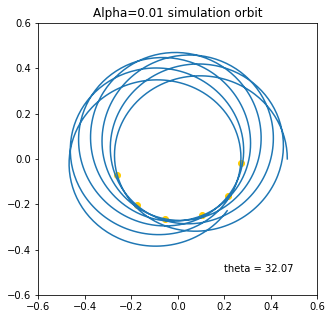

In [5]:
# first trial
import matplotlib.pyplot as plt
alpha = 0.01
t = np.linspace(0, 1.5, 1000)
result = odeint(motion_equation, init_para, t)

peri = find_peri(result[:, 0], result[:, 1])
delta_theta, dtheta_dt = find_theta(result[:, 0], result[:, 1], t)

plt.figure(figsize=[5, 5])
plt.plot(result[:, 0], result[:, 1])
plt.scatter(result[:, 0][peri], result[:, 1][peri], c=[(1, 0.8, 0)])
plt.xlim(-0.6, 0.6)
plt.ylim(-0.6, 0.6)
plt.text(0.2, -0.5, f"theta = {delta_theta:.2f}")
plt.title(f"Alpha={alpha:.2f} simulation orbit")
plt.show()

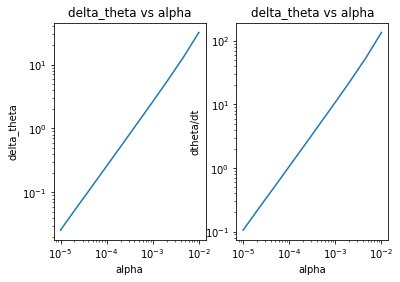

So I use linear fit to extrapolate for real alpha


In [6]:
t = np.linspace(0, 3, 100000)
delta_theta = []
dtheta_dt = []
alpha_space = np.logspace(-5, -2, 10)
for alpha in alpha_space:
    result = odeint(motion_equation, init_para, t)
    dthe, dth_dt = find_theta(result[:, 0], result[:, 1], t)
    delta_theta.append(dthe)
    dtheta_dt.append(dth_dt)

plt.figure()
plt.subplot(121)
plt.title("delta_theta vs alpha")
plt.loglog(alpha_space, delta_theta)
plt.ylabel("delta_theta")
plt.xlabel("alpha")
plt.subplot(122)
plt.title("delta_theta vs alpha")
plt.loglog(alpha_space, dtheta_dt)
plt.ylabel("dtheta/dt")
plt.xlabel("alpha")
plt.show()
print("So I use linear fit to extrapolate for real alpha")

In [7]:
# linear fit for log(delta_theta) and log(alpha)
f = lambda xx, k, b: xx * k + b
[k_the, b_the], _ = curve_fit(f, np.log10(alpha_space), np.log10(delta_theta))
[k_dthe, b_dthe], _ = curve_fit(f, np.log10(alpha_space), np.log10(dtheta_dt))
real_alpha = np.log10(1.1e-8)
real_theta = 10**(k_the * real_alpha + b_the)
real_dtheta_dt = 10**(k_dthe * real_alpha + b_dthe)
print(f"For alpha = {real_alpha:.1e}, theta per period = {real_theta:.2e} degree, dtheta/dt = {real_dtheta_dt:.2e} degree/yr")

For alpha = -8.0e+00, theta per period = 2.34e-05 degree, dtheta/dt = 9.31e-05 degree/yr


Comment: The method used extrapolating method to find the procession velocity when a perameter alpha is very small. To calculate some standard value for prediction, it used ODE integration to simulate the movement of Mercury. 

3. Consider the IVP
    $$
    \frac{dy}{dt}  + 100y = (99t + 1) e^{-t} ,\; y(0) = 1 
    $$
    The exact solution is 
    $$
    y = e^{-100t} + te^{-t} 
    $$
    so that the first term quickly becomes negligible relative to the second term, but continues to govern stability.

    Apply forward Euler's method with $h = 0.1$ and plot the solution estimates versus $0 \leq t \leq 1$. Repeat with $h = 0.01$ and plot versus $0\leq t \leq 5$. Discuss on your results.

4. Use shooting method to solve the given boundary problem using step sizes $h=0.05$. Plot your approximate solutions and the actual solutions on the same coordinate system.
   
    (1) $y^{\prime\prime}=2y^{\prime}-y+x^{2}-1$ over $\left[  0,1\right]$ with $y\left(  0\right)  =5$ and $y\left(  1\right)  =10$, exact solution $y\left(  t\right)   =x^{2}+4x+5$

    (2) $y^{\prime\prime}+\left(  1/x\right)  y^{\prime}+(1-1/\left(4x^{2}\right)  )y=0$ over $\left[  1,6\right]$ with $y\left(  1\right)  =1$ and $y\left(  6\right)  =0$, exact solution $y\left(  x\right)  =\dfrac{0.2913843206\cos\left(  x\right)  +1.001299385\sin\left(  x\right)  }{\sqrt{x}}$
